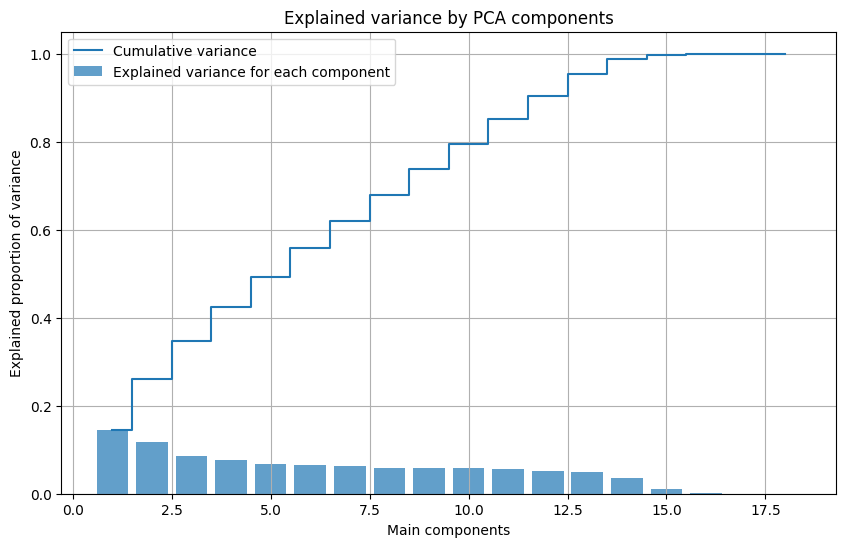

Optimal number of main components: 13


In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
dataset = pd.read_csv('../dataset_with_has_delay.csv')

# Delete irrelevant columns
columns_to_drop = ['Week', 'Year']
data_for_pca = dataset.drop(columns=columns_to_drop)

# Standarize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        label='Explained variance for each component')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative variance')
plt.xlabel('Main components')
plt.ylabel('Explained proportion of variance')
plt.title('Explained variance by PCA components')
plt.legend(loc='best')
plt.grid()
plt.show()

# Find the optimal number of components
optimal_components = next(i for i, v in enumerate(cumulative_variance) if v >= 0.95) + 1
print(f"Optimal number of main components: {optimal_components}")

# Apply PCA with the optimal number of components
pca_limited = PCA(n_components=optimal_components)
reduced_data = pca_limited.fit_transform(scaled_data)

# Save the reduced dataset
# reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(optimal_components)])
# reduced_df.to_csv('pca_reduced_dataset.csv', index=False)
# print("Reduced dataset saved in: 'pca_reduced_dataset.csv'")


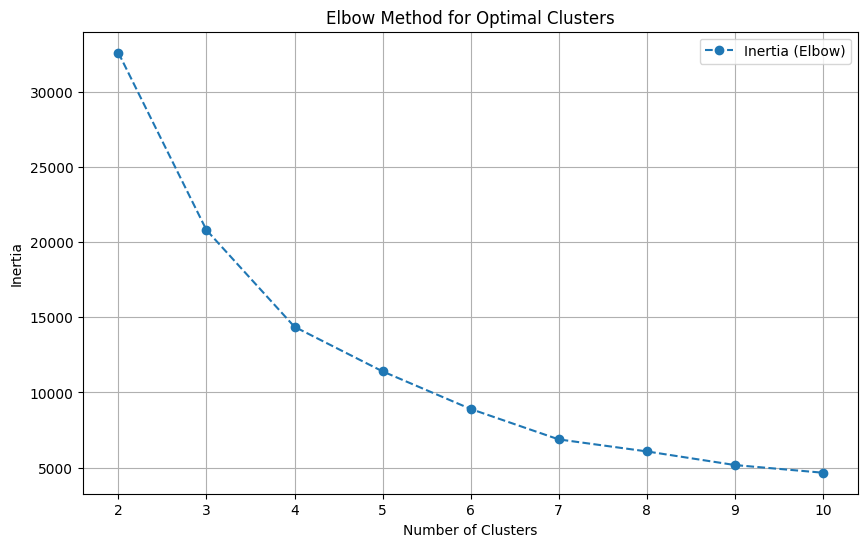

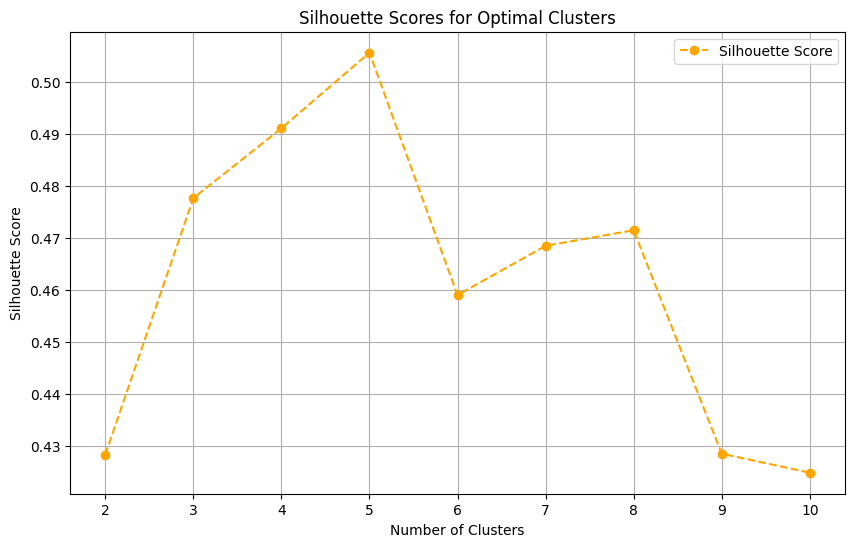

Optimal number of clusters based on Silhouette Score: 5


In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Use the PCA-transformed data for clustering
pca_2d = reduced_data[:, :2]  # Use first 2 components for simplicity

# Evaluate inertia (Elbow Method)
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test between 2 and 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_2d)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pca_2d, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', label='Inertia (Elbow)')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.legend()
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange', label='Silhouette Score')
plt.title('Silhouette Scores for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.legend()
plt.show()

# Identify best number of clusters from silhouette score
optimal_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters based on Silhouette Score: {optimal_clusters}")


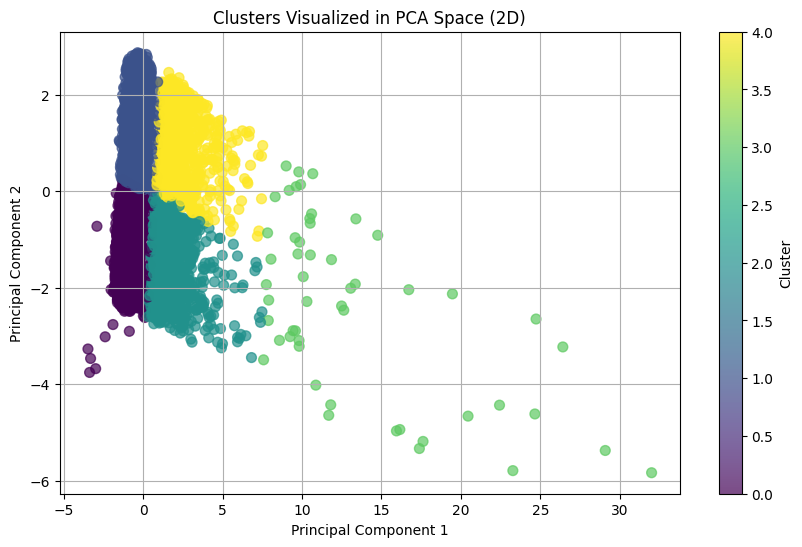

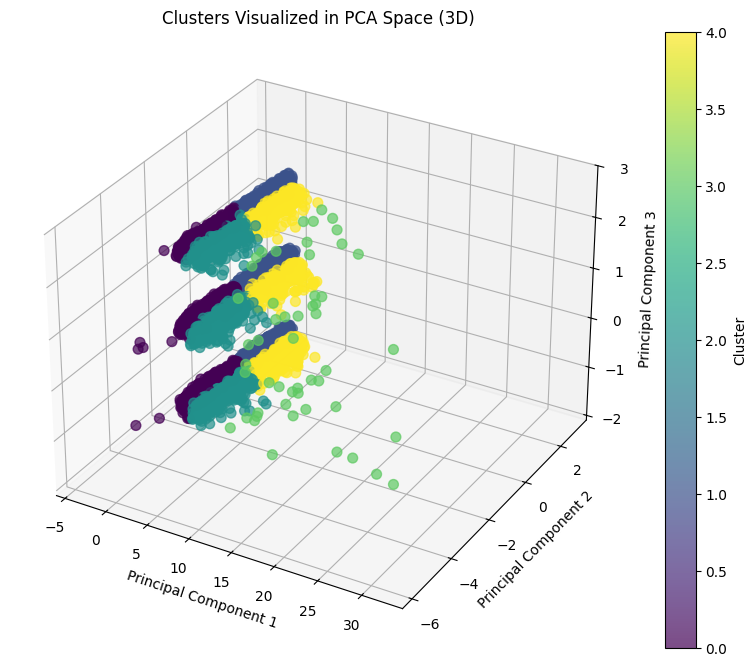

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use the first 2 components for visualization
pca_2d = reduced_data[:, :2]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(pca_2d)
labels = kmeans.labels_

# Visualize the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Clusters Visualized in PCA Space (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Visualize in 3D (using first 3 components)
pca_3d = reduced_data[:, :3]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
ax.set_title('Clusters Visualized in PCA Space (3D)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.colorbar(scatter, label='Cluster')
plt.show()


In [7]:
# Eliminar columnas irrelevantes
columns_to_drop = ['Week', 'Year']
data_for_pca = dataset.drop(columns=columns_to_drop)

# Estandarizar los datos solo con las columnas relevantes
scaled_data = scaler.fit_transform(data_for_pca)

# Aplicar PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Crear un DataFrame con las cargas de los componentes principales
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
    index=data_for_pca.columns
)

# Mostrar las cargas
print("Cargas de los Componentes Principales:")
print(loadings)


Cargas de los Componentes Principales:
                   PC1       PC2       PC3       PC4       PC5       PC6  \
Line         -0.021965  0.020876 -0.284554  0.524648 -0.152785  0.231642   
Location     -0.087216  0.021522  0.372433  0.141147 -0.133253 -0.048094   
Incident     -0.173906 -0.022924  0.026021  0.224574 -0.136879 -0.331668   
Min Delay     0.600399  0.023937  0.069708  0.122903 -0.061259 -0.004967   
Min Gap       0.602692  0.027548  0.064084  0.125961 -0.065232 -0.010694   
Vehicle      -0.074102 -0.013008 -0.135938  0.603963 -0.185576  0.020349   
has_delay     0.468716 -0.007066  0.042283 -0.032107  0.004927 -0.053146   
Month         0.040183  0.028618  0.053803 -0.240805  0.303921  0.350398   
Day_of_Month -0.006090 -0.001707 -0.084354 -0.039085 -0.055835  0.266432   
Hour         -0.017388  0.058349 -0.106458  0.091614  0.137697  0.718924   
Minute        0.004484 -0.019399  0.032367  0.112979  0.072871 -0.004168   
Bound_B      -0.002299 -0.002678  0.007210 -0.080

In [9]:
# Ordenar las variables por la contribución a cada componente
top_variables_per_pc = {}
for i in range(loadings.shape[1]):
    top_variables_per_pc[f'PC{i+1}'] = loadings.iloc[:, i].sort_values(ascending=False).head(3).index.tolist()

print("Variables más influyentes por componente principal:")
for pc, variables in top_variables_per_pc.items():
    print(f"{pc}: {', '.join(variables)}")


Variables más influyentes por componente principal:
PC1: Min Gap, Min Delay, has_delay
PC2: Bound_W, Hour, Month
PC3: Bound_S, Bound_N, Location
PC4: Vehicle, Line, Bound_N
PC5: Bound_N, Month, Hour
PC6: Hour, Month, Bound_S
PC7: Bound_B, Hour, Bound_N
PC8: Bound_B, Day_of_Month, Minute
PC9: Minute, Bound_B, Bound_S
PC10: Location, Month, Line
PC11: Month, Incident, Bound_B
PC12: Vehicle, Month, Bound_S
PC13: Line, Bound_N, Bound_S
PC14: has_delay, Incident, Hour
PC15: Bound_E, Bound_W, Bound_N
PC16: Min Gap, Hour, Month


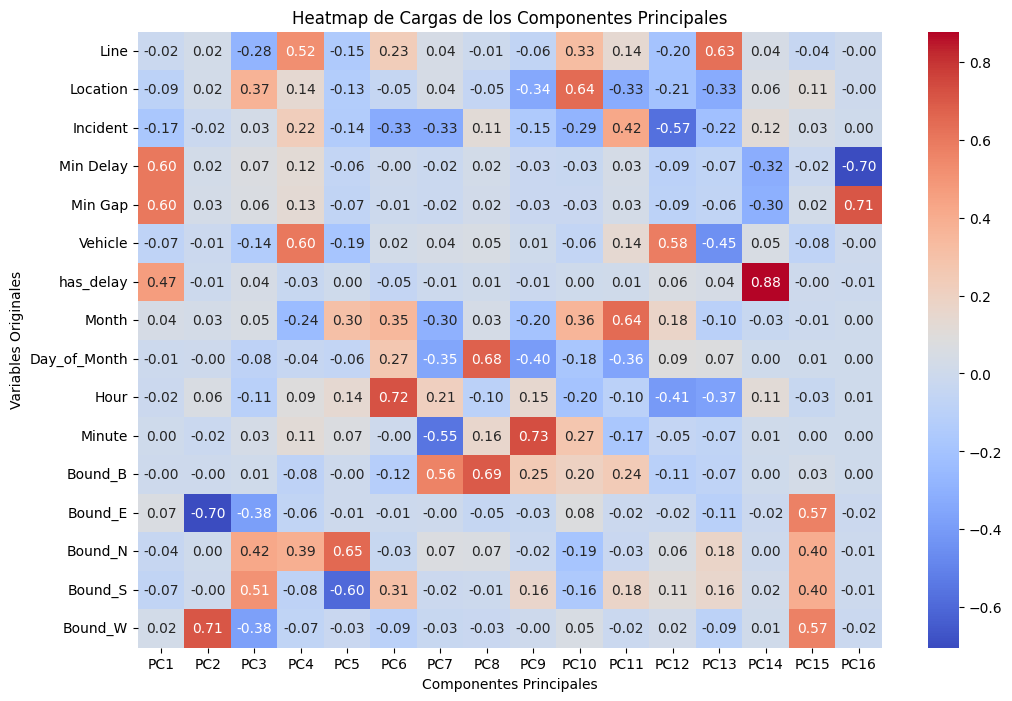

In [12]:
import seaborn as sns
import numpy as np

# Heatmap de las cargas
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap de Cargas de los Componentes Principales')
plt.xlabel('Componentes Principales')
plt.ylabel('Variables Originales')
plt.show()


In [16]:
# Transformar los datos de vuelta al espacio de las variables originales
correlations = pd.DataFrame(
    pca.components_ @ np.diag(pca.explained_variance_),
    index=[f'PC{i+1}' for i in range(len(pca.explained_variance_))],
    columns=data_for_pca.columns
)

# Mostrar correlaciones
print("Correlaciones entre componentes y variables originales:")
print(correlations)


Correlaciones entre componentes y variables originales:
          Line  Location  Incident  Min Delay   Min Gap   Vehicle  has_delay  \
PC1  -0.053452 -0.127268 -0.225512   0.701392  0.686965 -0.079907   0.475553   
PC2   0.050802  0.031406 -0.029726   0.027963  0.031400 -0.014027  -0.007169   
PC3  -0.692474  0.543467  0.033743   0.081433  0.073044 -0.146588   0.042900   
PC4   1.276751  0.205967  0.291215   0.143577  0.143574  0.651280  -0.032575   
PC5  -0.371809 -0.194448 -0.177497  -0.071563 -0.074353 -0.200115   0.004999   
PC6   0.563709 -0.070181 -0.430088  -0.005802 -0.012189  0.021943  -0.053921   
PC7   0.091032  0.062993 -0.429148  -0.025654 -0.023108  0.046491  -0.009569   
PC8  -0.021095 -0.079025  0.146497   0.025481  0.019137  0.056406   0.007526   
PC9  -0.153454 -0.502692 -0.197496  -0.031638 -0.032868  0.005577  -0.014071   
PC10  0.793300  0.940472 -0.370333  -0.038324 -0.031009 -0.064398   0.001566   
PC11  0.335025 -0.475438  0.546705   0.037831  0.034025  0.15120

In [14]:
# Descripciones textuales basadas en las variables más influyentes
component_descriptions = []
for pc, variables in top_variables_per_pc.items():
    description = f"{pc} está influenciado principalmente por {', '.join(variables)}."
    component_descriptions.append(description)

print("Descripciones de los Componentes Principales:")
for desc in component_descriptions:
    print(desc)


Descripciones de los Componentes Principales:
PC1 está influenciado principalmente por Min Gap, Min Delay, has_delay.
PC2 está influenciado principalmente por Bound_W, Hour, Month.
PC3 está influenciado principalmente por Bound_S, Bound_N, Location.
PC4 está influenciado principalmente por Vehicle, Line, Bound_N.
PC5 está influenciado principalmente por Bound_N, Month, Hour.
PC6 está influenciado principalmente por Hour, Month, Bound_S.
PC7 está influenciado principalmente por Bound_B, Hour, Bound_N.
PC8 está influenciado principalmente por Bound_B, Day_of_Month, Minute.
PC9 está influenciado principalmente por Minute, Bound_B, Bound_S.
PC10 está influenciado principalmente por Location, Month, Line.
PC11 está influenciado principalmente por Month, Incident, Bound_B.
PC12 está influenciado principalmente por Vehicle, Month, Bound_S.
PC13 está influenciado principalmente por Line, Bound_N, Bound_S.
PC14 está influenciado principalmente por has_delay, Incident, Hour.
PC15 está influencia